In [1]:
import pandas as pd
import os
import re
import pdb
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 12)
directory = r'/home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza'

In [3]:
# Iterate over all files that end with .out
d = {}
for filename in os.listdir(directory):
    if filename.endswith(".out"):
        d[filename] = {}
        pth = os.path.join(directory, filename)
        print("Reading {}.".format(pth))
        valid_run_bit = 0
        with open(pth, 'r') as f:
            for line in f:
                if line.startswith("***") or line.startswith("\n"):
                    continue
                if line.startswith("End of arguments."):
                    valid_run_bit = 1
                    break
                
                splt = line.strip().split(" ")
                try:
                    k,v = splt
                except:
                    print(splt)
                    break
                d[filename][k] = v
                
            if valid_run_bit == 0:
                os.remove(pth)
                pre, ext = os.path.splitext(pth)
                os.remove(pre + ".err")
                continue
            # For every experiment add the evaluation results too 
            for line in f:
                if "val_acc_novel" in line:
                    d[filename]["val_acc_novel"] = float(line.strip().split(" ")[1].strip(','))
#                     pdb.set_trace()
                elif "val_acc_base" in line:
                    d[filename]["val_acc_base"] = float(line.strip().split(" ")[1].strip(','))
                elif "val_acc_average" in line:
                    d[filename]["val_acc_average"] = float(line.strip().split(" ")[1].strip(','))
                elif "test_acc_novel" in line:
                    d[filename]["test_acc_novel"] = float(line.strip().split(" ")[1].strip(','))
                elif "test_acc_base" in line:
                    d[filename]["test_acc_base"] = float(line.strip().split(" ")[1].strip(','))
                elif "test_acc_average" in line:
                    d[filename]["test_acc_average"] = float(line.strip().split(" ")[1].strip(','))
                    break


Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453259.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453258.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453257.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453264.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453256.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453260.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453261.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453262.out.
Reading /home/gridsan/groups/akyureklab/rfs-incremental/dumped/dumped_feyza/3453263.out.


In [4]:
df = pd.DataFrame(d).transpose()#.dropna()

In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 16)
df.loc[(df['n_shots']=='5') & 
       (df['eval_mode'] == "few-shot-language-incremental") &
       (df['classifier'] == "lang-linear"),:].sort_values('val_acc_average', ascending=False)

,model,model_path,dataset,transform,data_root,n_test_runs,n_ways,n_shots,n_queries,n_aug_support_samples,num_workers,test_batch_size,test_base_batch_size,eval_mode,classifier,neval_episodes,word_embed_size,word_embed_path,lang_classifier_bias,multip_fc,attention,novel_epochs,learning_rate,weight_decay,momentum,adam,freeze_backbone_at,lmbd_reg_transform_w,target_train_loss,saliency,use_trainval,data_aug,git_head_hash,val_acc_novel,val_acc_base,val_acc_average,test_acc_novel,test_acc_base,test_acc_average
3453262.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped/backbones/c-x-concat/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_630620/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.0005,0.9,False,1,0.5,0.7,False,False,True,bbb406d,73.908,67.4329,70.6704,70.606,67.66,69.133
3453263.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped/backbones/c-x-concat/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_630620/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.0005,0.9,False,1,0.4,0.7,False,False,True,bbb406d,72.826,68.4992,70.6626,69.092,68.89,68.991
3453256.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped//backbones/c-x-concat/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_630620/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.0005,0.9,False,1,0.3,0.7,False,False,True,817d4c7,70.602,70.5881,70.595,66.596,70.67,68.633
3453261.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped/backbones/c-x-sum/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_858201/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.0005,0.9,False,1,0.5,0.7,False,False,True,22da502,73.364,67.769,70.5665,69.754,68.344,69.049
3453260.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped/backbones/c-x-sum/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_858201/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.0005,0.9,False,1,0.4,0.7,False,False,True,22da502,72.056,69.0061,70.531,68.236,69.184,68.71
3453258.out,resnet12,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/dumped/backbones/c-x-sum/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang-linear_multip_0.05_858201/resnet12_last.pth,miniImageNet,A,/afs/csail.mit.edu/u/a/akyurek/akyurek/git/rfs-incremental/data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,2000,500,/afs/csail.mit.edu/u/a/akyurek/akyurek/feyza/git/rfs-incremental/word_embeds,False,0.05,True,20,0.002,0.

In [100]:
df.loc[(df['n_shots']=='5') & 
       (df['eval_mode'] == "few-shot-language-incremental") &
       (df['classifier'] == "description-linear"),:].sort_values('val_acc_average', ascending=False)

,model,model_path,dataset,transform,data_root,n_test_runs,n_ways,n_shots,n_queries,n_aug_support_samples,num_workers,test_batch_size,test_base_batch_size,eval_mode,classifier,word_embed_size,word_embed_path,lang_classifier_bias,multip_fc,novel_epochs,learning_rate,weight_decay,momentum,adam,freeze_backbone_at,lmbd_reg_transform_w,target_train_loss,description_embed_path,desc_embed_model,transformer_layer,prefix_label,use_trainval,data_aug,neval_episodes,val_acc_novel,val_acc_base,val_acc_average,test_acc_novel,test_acc_base,test_acc_average,saliency,git_head_hash
8030718_46.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,10,0.001,0.0005,0.9,False,1,0.01,0.5,description_embeds,bert-base-cased,8,True,False,True,2000,61.558,71.7076,66.6328,55.864,68.992,62.428,False,f1ac5b3
8030718_49.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,14,0.001,0.0005,0.9,False,1,0.01,0.5,description_embeds,bert-base-cased,8,True,False,True,2000,61.506,71.6459,66.576,55.688,69.148,62.418,False,4115838
8030718_52.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,18,0.001,0.0005,0.9,False,1,0.01,0.5,description_embeds,bert-base-cased,8,True,False,True,2000,61.41,71.7249,66.5674,55.72,68.99,62.355,False,4115838
8030718_50.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,14,0.002,0.0005,0.9,False,1,0.01,0.5,description_embeds,bert-base-cased,8,True,False,True,2000,62.48,70.6354,66.5577,56.734,67.65,62.192,False,4115838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030718_17.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,18,0.002,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,6,True,False,True,2000,55.544,72.3701,63.957,51.498,70.02,60.759,NaN,NaN
8030718_13.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,14,0.001,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,6,True,False,True,2000,54.298,73.5992,63.9486,50.442,71.284,60.863,NaN,NaN
8030718_16.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,18,0.001,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,6,True,False,True,2000,54.344,73.5279,63.936,50.486,71.092,60.789,NaN,NaN
8030718_10.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,10,0.001,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,6,True,False,True,2000,54.33,73.5183,63.9241,50.42,71.436,60.928,NaN,NaN


In [95]:
df.loc[(df['n_shots']=='5') & (df['eval_mode'] == "few-shot-incremental-fine-tune"),:].sort_values('val_acc_average', ascending=False)

,model,model_path,dataset,transform,data_root,n_test_runs,n_ways,n_shots,n_queries,n_aug_support_samples,num_workers,test_batch_size,test_base_batch_size,eval_mode,classifier,word_embed_size,word_embed_path,lang_classifier_bias,multip_fc,novel_epochs,learning_rate,weight_decay,momentum,adam,freeze_backbone_at,lmbd_reg_transform_w,target_train_loss,description_embed_path,desc_embed_model,transformer_layer,prefix_label,use_trainval,data_aug,neval_episodes,val_acc_novel,val_acc_base,val_acc_average,test_acc_novel,test_acc_base,test_acc_average,saliency,git_head_hash
8079055_3.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.2,0.5,NaN,NaN,NaN,NaN,False,True,2000,73.352,67.9137,70.6329,70.356,67.48,68.918,False,9c510a2
8079055_6.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.3,0.6,NaN,NaN,NaN,NaN,False,True,2000,73.176,68.0816,70.6288,69.606,67.964,68.785,False,9c510a2
8079055_5.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.3,0.5,NaN,NaN,NaN,NaN,False,True,2000,74.924,66.0167,70.4703,72.132,65.692,68.912,False,9c510a2
8079055_1.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.1,0.5,NaN,NaN,NaN,NaN,False,True,2000,70.086,70.6414,70.3637,67.03,69.924,68.477,False,9c510a2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076966_2.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.1,0.6,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,9c510a2
8071806_8.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.3,0.5,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,b85c2d0
8076966_6.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.3,0.6,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,9c510a2
8076966_3.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-incremental-fine-tune,linear,NaN,NaN,NaN,NaN,20,0.002,0.0005,0.9,False,1,0.2,0.5,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,9c510a2


In [101]:
df.loc[(df['n_shots']=='1'),:].\
sort_values('val_acc_average', ascending=False)

,model,model_path,dataset,transform,data_root,n_test_runs,n_ways,n_shots,n_queries,n_aug_support_samples,num_workers,test_batch_size,test_base_batch_size,eval_mode,classifier,word_embed_size,word_embed_path,lang_classifier_bias,multip_fc,novel_epochs,learning_rate,weight_decay,momentum,adam,freeze_backbone_at,lmbd_reg_transform_w,target_train_loss,description_embed_path,desc_embed_model,transformer_layer,prefix_label,use_trainval,data_aug,neval_episodes,val_acc_novel,val_acc_base,val_acc_average,test_acc_novel,test_acc_base,test_acc_average,saliency,git_head_hash
8028214_10.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,4,0.002,0.0005,0.9,True,1,0.01,1.8,description_embeds,bert-base-cased,6,True,False,True,2000,54.11,59.3172,56.7136,47.304,57.844,52.574,NaN,NaN
7993636_4.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,15,5,3,1,64,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,5,0.01,0.0005,0.9,False,1,0.01,0.6,description_embeds,bert-base-cased,8,True,False,True,NaN,38.9,74.3721,56.636,32.4156,72.9421,52.6788,NaN,NaN
8028214_16.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,4,0.002,0.0005,0.9,True,1,0.01,2.0,description_embeds,bert-base-cased,6,True,False,True,2000,54.018,59.195,56.6065,47.332,57.562,52.447,NaN,NaN
8028214_4.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,5,5,4,1,50,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,4,0.002,0.0005,0.9,True,1,0.01,1.6,description_embeds,bert-base-cased,6,True,False,True,2000,54.066,59.0861,56.576,47.28,57.448,52.364,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008978_4.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,15,5,3,1,64,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,5,0.01,0.0005,0.9,False,1,0.01,0.6,description_embeds,bert-base-cased,8,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8008978_1.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,15,5,3,1,64,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,5,0.01,0.0005,0.9,False,1,0.01,0.6,description_embeds,bert-base-cased,6,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8008978_5.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,15,5,3,1,64,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,5,0.01,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,8,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8008944_2.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,1,15,5,3,1,64,few-shot-language-incremental,description-linear,None,word_embeds,False,0.1,5,0.01,0.0005,0.9,False,1,0.01,0.7,description_embeds,bert-base-cased,6,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.loc[(df['n_shots']=='5') & (df['eval_mode'] == "few-shot-language-incremental"),:].\
sort_values('val_acc_average', ascending=False

,model,model_path,dataset,transform,data_root,n_test_runs,n_ways,n_shots,n_queries,n_aug_support_samples,num_workers,test_batch_size,test_base_batch_size,eval_mode,classifier,word_embed_size,word_embed_path,lang_classifier_bias,multip_fc,novel_epochs,learning_rate,weight_decay,momentum,adam,freeze_backbone_at,lmbd_reg_transform_w,target_train_loss,description_embed_path,desc_embed_model,transformer_layer,prefix_label,use_trainval,data_aug,neval_episodes,val_acc_novel,val_acc_base,val_acc_average,test_acc_novel,test_acc_base,test_acc_average,saliency,git_head_hash
8070314_6.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.05,20,0.002,0.0005,0.9,False,1,0.2,0.5,NaN,NaN,NaN,NaN,False,True,2000,68.764,67.5737,68.1689,64.622,66.032,65.327,False,4115838
8070314_2.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.05,20,0.002,0.0005,0.9,False,1,0.1,0.5,NaN,NaN,NaN,NaN,False,True,2000,66.648,68.6916,67.6698,62.472,66.886,64.679,False,4115838
8070314_8.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.05,20,0.002,0.0005,0.9,False,1,0.2,0.6,NaN,NaN,NaN,NaN,False,True,2000,65.594,69.6556,67.6248,61.214,67.948,64.581,False,4115838
8070314_5.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.05,20,0.005,0.0005,0.9,False,1,0.2,0.5,NaN,NaN,NaN,NaN,False,True,2000,70.624,64.3454,67.4847,66.84,62.568,64.704,False,4115838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070186_3.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,10,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.1,20,0.006,0.0005,0.9,False,1,0.1,0.6,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,4115838
8070195_3.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,10,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.1,20,0.006,0.0005,0.9,False,1,0.1,0.6,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,4115838
8070221_2.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.1,20,0.002,0.0005,0.9,False,1,0.1,0.5,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,4115838
8070285_8.out,resnet12,/home/gridsan/akyurek/git/rfs-incremental/dump...,miniImageNet,A,data/miniImageNet,600,5,5,5,5,4,1,50,few-shot-language-incremental,lang-linear,500,word_embeds,False,0.05,20,0.002,0.0005,0.9,False,1,0.2,0.6,NaN,NaN,NaN,NaN,False,True,2000,NaN,NaN,NaN,NaN,NaN,NaN,False,4115838


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Backbone Trained with Labels')

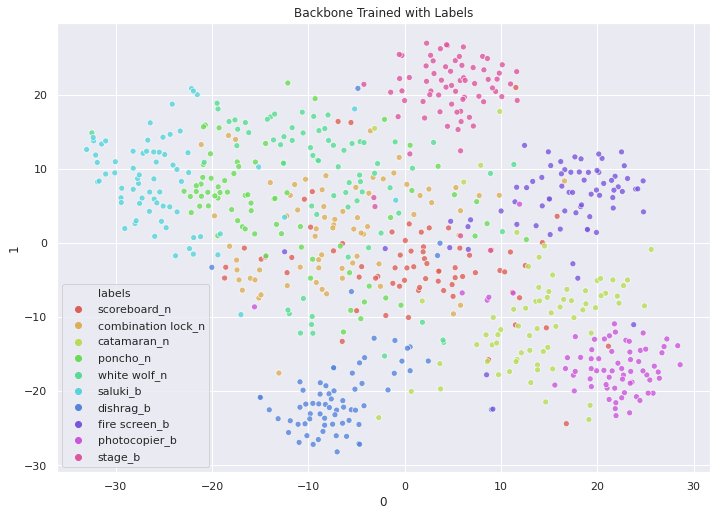

In [88]:
pth="/home/gridsan/akyurek/git/rfs-incremental/dumped/backbones/label/resnet12_miniImageNet_lr_0.05_decay_0.0005_trans_A_trial_pretrain_classifier_lang_linear_multip_0.05/tsne_embedded.csv"
tsnedf = pd.read_csv(pth)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    x="0", y="1",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=tsnedf,
    legend="full",
    alpha=0.8
).set_title('Backbone Trained with Labels')

Text(0.5, 1.0, 'Backbone Trained with Linear Classifier')

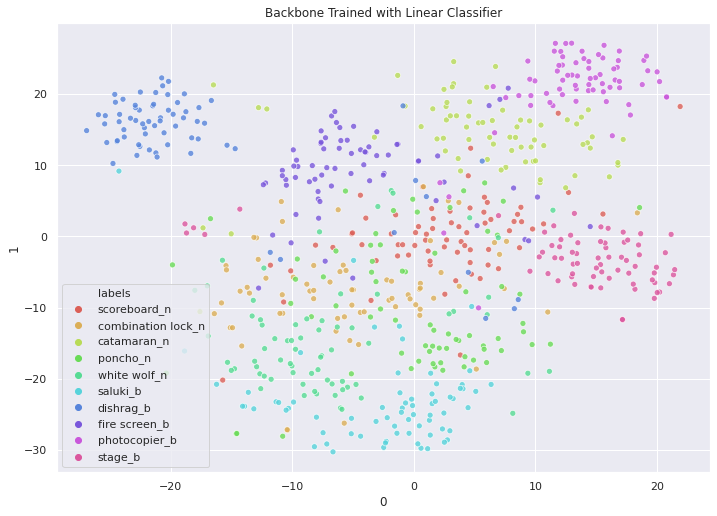

In [87]:
pth="/home/gridsan/akyurek/git/rfs-incremental/dumped/backbones/linear/resnet12_miniImageNet_linear_classifier_wbias/tsne_embedded.csv"
tsnedf = pd.read_csv(pth)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    x="0", y="1",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=tsnedf,
    legend="full",
    alpha=0.8
).set_title('Backbone Trained with Linear Classifier')